Implementing Feed-forward neural networks with Keras and TensorFlow

a. Import the necessary packages

b. Load the training and testing data (MNIST/CIFAR10)

c. Define the network architecture using Keras

d. Train the model using SGD

e. Evaluate the network

f. Plot the training loss and accuracy

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    keras.layers.Dense(256, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units for classification
])



Images are often flattened before passing them through a dense (fully connected) layer in a neural network because dense layers require one-dimensional input.

In [ ]:
# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
h= model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7584 - accuracy: 0.7917 - val_loss: 0.3332 - val_accuracy: 0.9051
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3581 - accuracy: 0.8955 - val_loss: 0.2627 - val_accuracy: 0.9245
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2899 - accuracy: 0.9143 - val_loss: 0.2203 - val_accuracy: 0.9356
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2466 - accuracy: 0.9271 - val_loss: 0.1927 - val_accuracy: 0.9413
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2186 - accuracy: 0.9354 - val_loss: 0.1686 - val_accuracy: 0.9492
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1970 - accuracy: 0.9422 - val_loss: 0.1545 - val_accuracy: 0.9517
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1791 - accuracy: 0.9474 - val_loss: 0.1410 - val_accurac

In [1]:
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


NameError: ignored

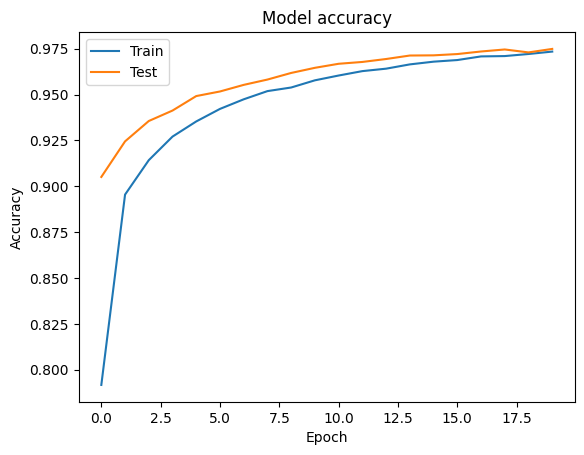

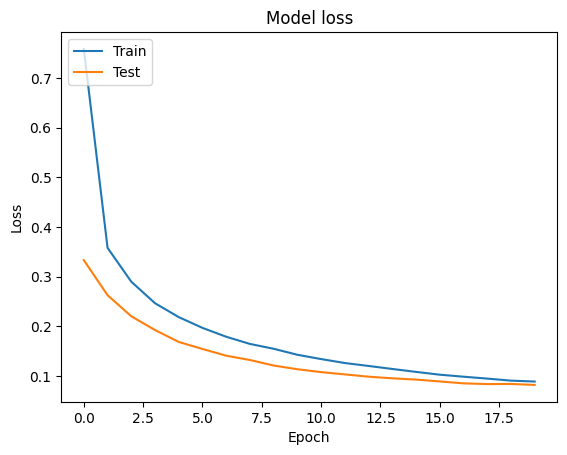

In [ ]:
# Plot training & validation accuracy values
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image  # Import the Python Imaging Library

# Load and preprocess the new image
img_path = '/content/4.jpeg'  # Replace with the path to your image
img = Image.open(img_path)  # Open the image
img = img.convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize to match the model's input size
img = np.array(img)  # Convert to a NumPy array
img = img.reshape(1, 28, 28)  # Reshape to match the expected input shape

# Normalize pixel values, if needed
img = img / 255.0

# Make predictions
predictions = model.predict(img)

# Decode the predictions if needed (e.g., for classification tasks)
predicted_class = np.argmax(predictions)
predicted_class

1/1 [==============================] - 0s 19ms/step


4

In [ ]:
a=np.max(predictions)
a

0.9994943

In [ ]:
predictions

array([[1.9782125e-07, 1.8512283e-09, 4.9883429e-06, 4.9294602e-08,
        9.9949431e-01, 8.7799235e-06, 2.5006079e-06, 4.0374571e-06,
        1.5242050e-06, 4.8355668e-04]], dtype=float32)